In [ ]:
# import ROOT
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 3001;"); # suppress ROOT messages
ROOT.disableJSVis()
ROOT.gStyle.SetOptStat(0)

# bcMax
# DS0: 
# raw 01: 349.000  05: 397.000  10: 425.000 15: 447.000  90: 681.000  95: 725.000  99: 827.000
# bg 01: 307.000  05: 327.000  10: 343.000 15: 355.000  90: 533.000  95: 553.000  99: 599.000
# ext 01: 375.000  05: 387.000  10: 395.000 15: 399.000  90: 473.000  95: 489.000  99: 523.000
# DS1:
# raw 01: 267.000  05: 295.000  10: 319.000 15: 337.000  90: 555.000  95: 639.000  99: 867.000
# bg 01: 253.000  05: 259.000  10: 265.000 15: 267.000  90: 373.000  95: 405.000  99: 537.000
# DS2: none yet
# DS3:
# raw 01: 283.000  05: 311.000  10: 333.000 15: 351.000  90: 565.000  95: 637.000  99: 943.000
# bg 01: 257.000  05: 273.000  10: 285.000 15: 293.000  90: 481.000  95: 497.000  99: 521.000
# DS4:
# raw 01: 263.000  05: 285.000  10: 301.000 15: 315.000  90: 503.000  95: 549.000  99: 699.000
# bg 01: 247.000  05: 253.000  10: 259.000 15: 263.000  90: 335.000  95: 371.000  99: 421.000
# DS5:
# raw 01: 287.000  05: 321.000  10: 345.000 15: 367.000  90: 643.000  95: 717.000  99: 879.000
# bg 01: 283.000  05: 303.000  10: 313.000 15: 323.000  90: 791.000  95: 893.000  99: 1119.000

def npTH1D(hist):
    bins = hist.GetNbinsX()
    xArr, yArr = np.zeros(bins),np.zeros(bins)
    for i in range(bins): 
        xArr[i] = hist.GetXaxis().GetBinCenter(i)
        yArr[i] = hist.GetBinContent(i)    
    return xArr,yArr

def integFunc(arr):
    integ = np.zeros(len(arr))
    sum = 0
    for i in range(0,len(arr)):
        sum+=arr[i]
        integ[i] = sum
    return integ

def GetIntegralPoints(hist):
    x_h0, y_h0 = npTH1D(hist)
    int_h0 = integFunc(y_h0)
    
    idx99 = np.where(int_h0 > 0.99)
    idx95 = np.where(int_h0 > 0.95)
    idx90 = np.where(int_h0 > 0.90)
    idx01 = np.where(int_h0 > 0.01)
    idx05 = np.where(int_h0 > 0.05)
    idx10 = np.where(int_h0 > 0.10)
    idx15 = np.where(int_h0 > 0.15)
    
    val99 = x_h0[idx99][0]
    val95 = x_h0[idx95][0]
    val90 = x_h0[idx90][0]
    val01 = x_h0[idx01][0]
    val05 = x_h0[idx05][0]
    val10 = x_h0[idx10][0]
    val15 = x_h0[idx15][0]
    return val01,val05,val10,val15,val90,val95,val99

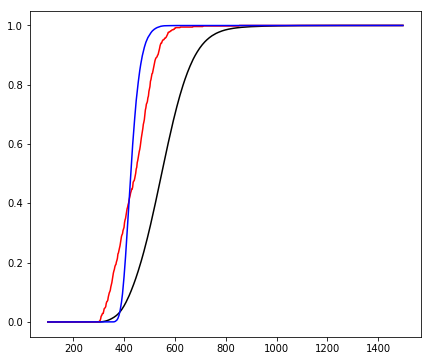

raw 01: 349.000  05: 397.000  10: 425.000 15: 447.000  90: 681.000  95: 725.000  99: 827.000
bg 01: 307.000  05: 327.000  10: 343.000 15: 355.000  90: 533.000  95: 553.000  99: 599.000
ext 01: 375.000  05: 387.000  10: 395.000 15: 399.000  90: 473.000  95: 489.000  99: 523.000


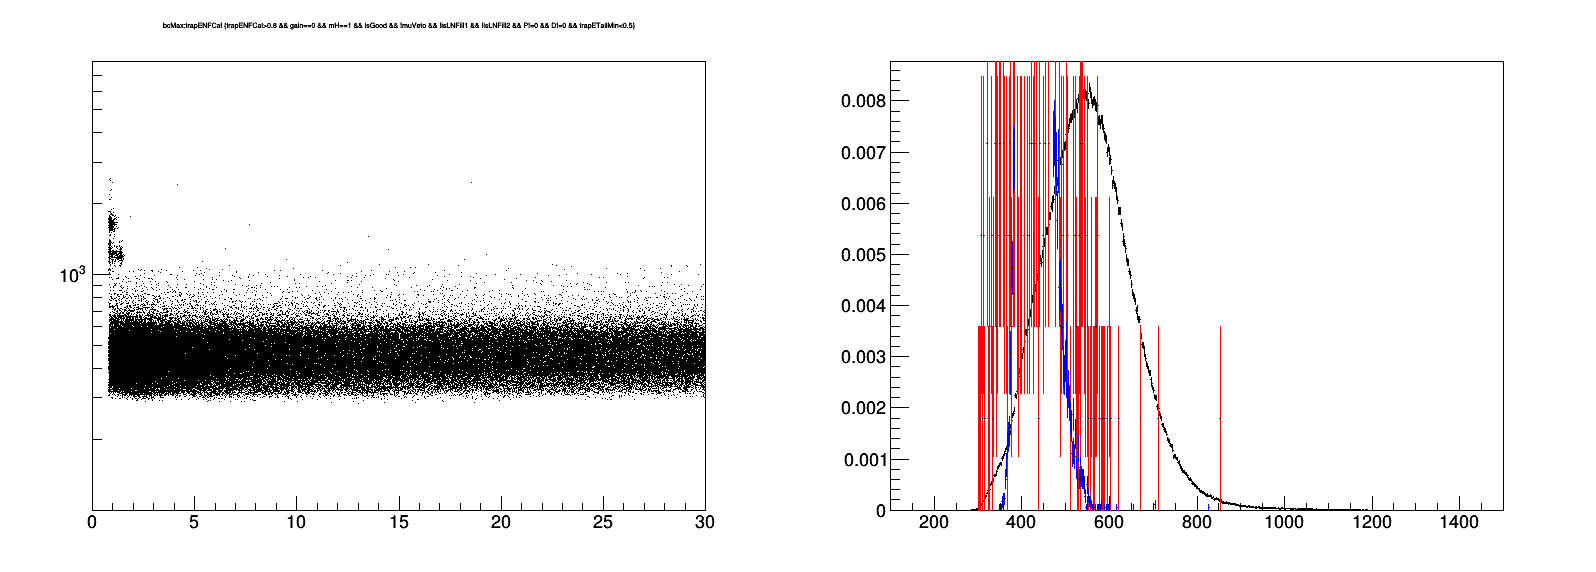

In [19]:
ds = 0
bins, lower, upper = 700,100,1500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
ExtCut = "channel == 624"
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)
Ext = ROOT.TChain("mjdTree"); Ext.Add("~/project/ForceTrigger/lat_run72*.root")

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("bcMax:trapENFCal>>h1(10,0,30,10,100,8000)",theCut)

c.cd(2); ROOT.gPad.SetLogy(0); ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
h02 = ROOT.TH1D("h02","",bins,lower,upper)
calib.Project("h0","bcMax",theCut+"&& trapENFCal > 5")
bg.Project("h01","bcMax",theCut+bgCut)
Ext.Project("h02","bcMax",ExtCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
h02.Scale(1/h02.Integral()); h02.SetLineColor(ROOT.kBlue); h02.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
ext01,ext05,ext10,ext15,ext90,ext95,ext99 = GetIntegralPoints(h02)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)
print "ext 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (ext01,ext05,ext10,ext15,ext90,ext95,ext99)


fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
x2_h0, y2_h0 = npTH1D(h02)
int2_h0 = integFunc(y2_h0)
plt.plot(x2_h0,int2_h0,'blue')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

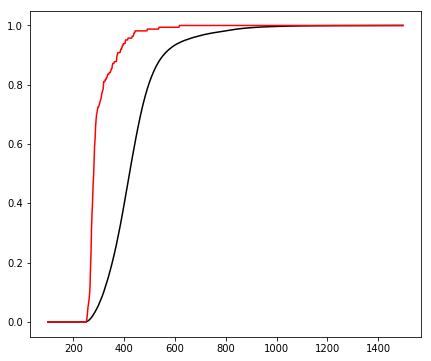

raw 01: 267.000  05: 295.000  10: 319.000 15: 337.000  90: 555.000  95: 639.000  99: 867.000
bg 01: 253.000  05: 259.000  10: 265.000 15: 267.000  90: 373.000  95: 405.000  99: 537.000


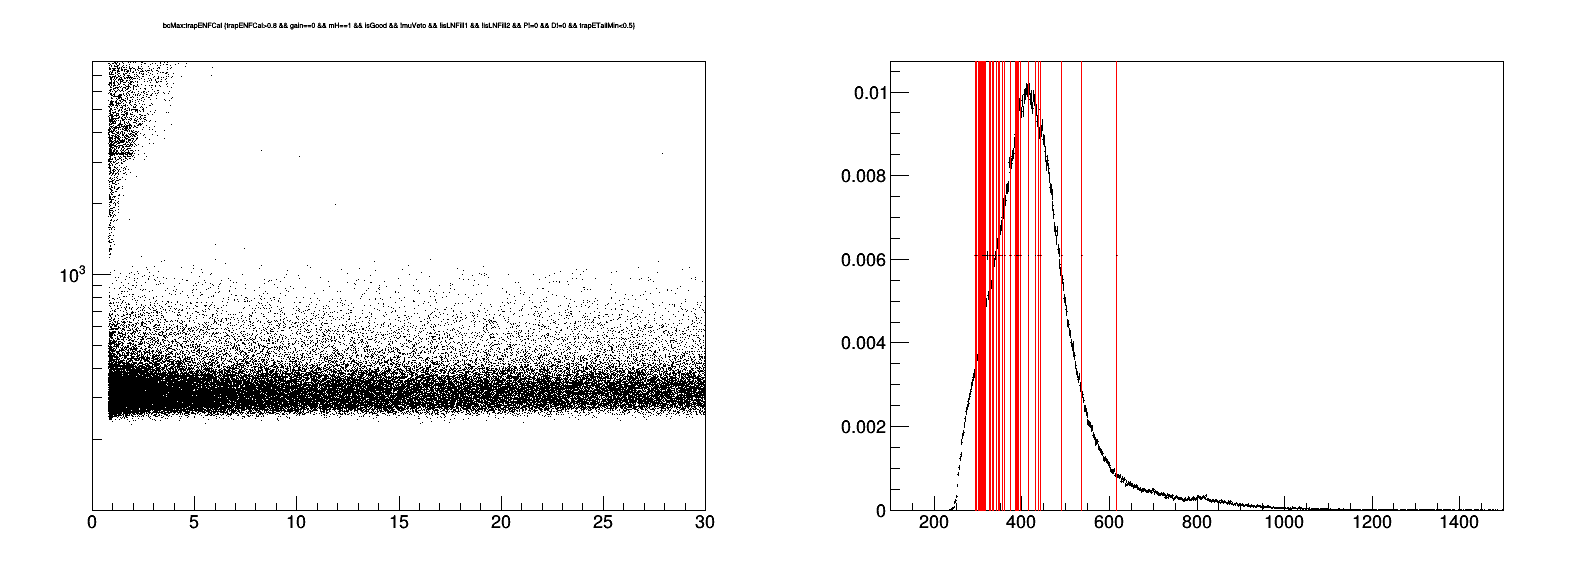

In [20]:
ds = 1
bins, lower, upper = 700,100,1500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("bcMax:trapENFCal>>h1(10,0,30,10,100,8000)",theCut)

c.cd(2); ROOT.gPad.SetLogy(0); ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","bcMax",theCut+"&& trapENFCal > 5")
bg.Project("h01","bcMax",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)


fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

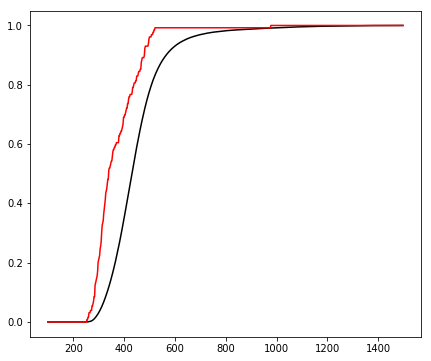

raw 01: 283.000  05: 311.000  10: 333.000 15: 351.000  90: 565.000  95: 637.000  99: 943.000
bg 01: 257.000  05: 273.000  10: 285.000 15: 293.000  90: 481.000  95: 497.000  99: 521.000


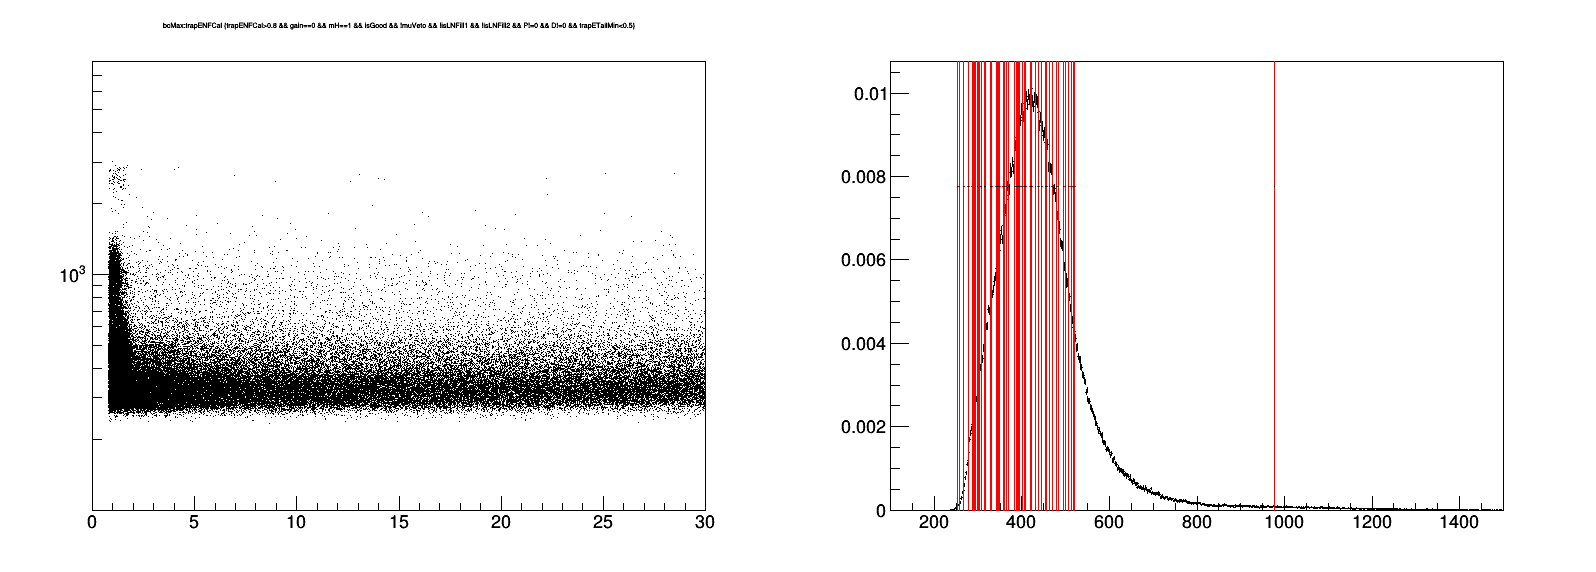

In [21]:
ds = 3
bins, lower, upper = 700,100,1500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("bcMax:trapENFCal>>h1(10,0,30,10,100,8000)",theCut)

c.cd(2); ROOT.gPad.SetLogy(0); ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","bcMax",theCut+"&& trapENFCal > 5")
bg.Project("h01","bcMax",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)


fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

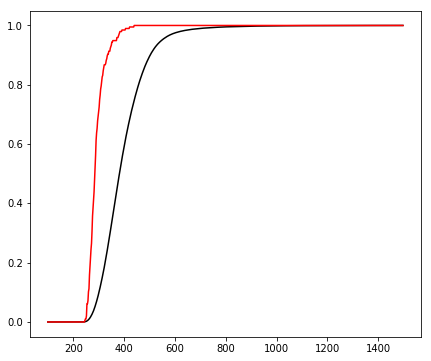

raw 01: 263.000  05: 285.000  10: 301.000 15: 315.000  90: 503.000  95: 549.000  99: 699.000
bg 01: 247.000  05: 253.000  10: 259.000 15: 263.000  90: 335.000  95: 371.000  99: 421.000


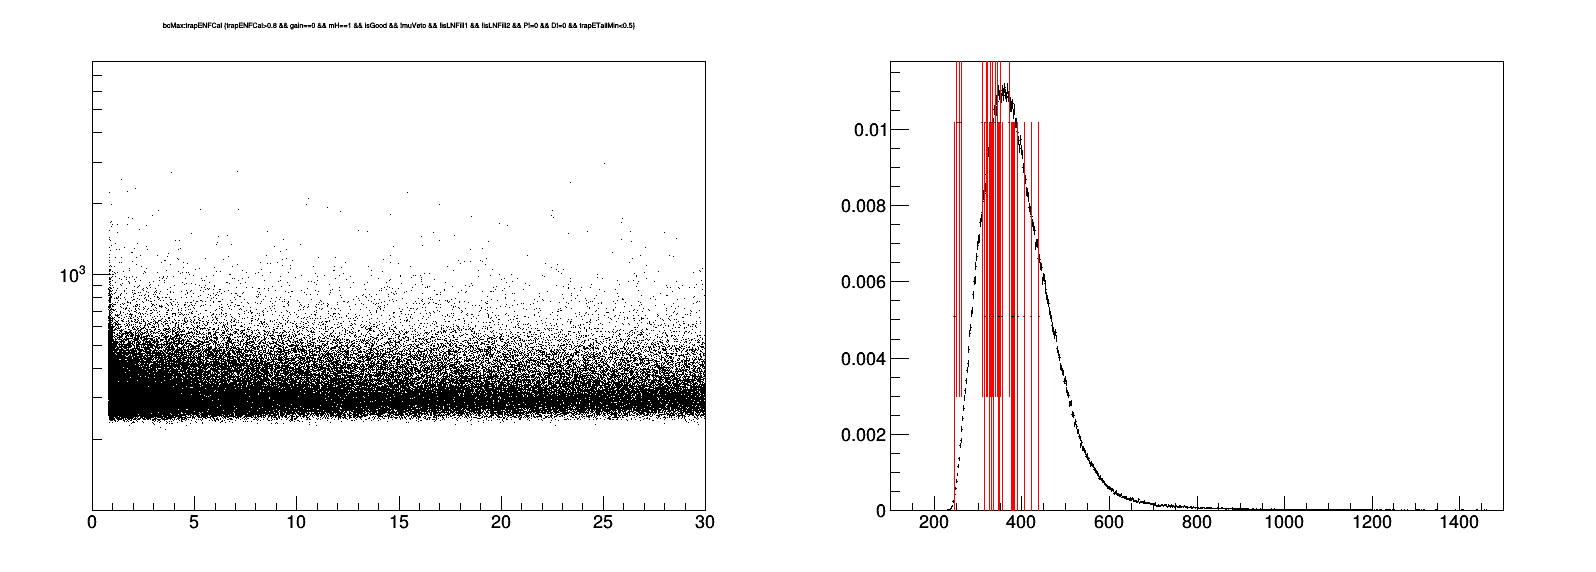

In [22]:
ds = 4
bins, lower, upper = 700,100,1500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("bcMax:trapENFCal>>h1(10,0,30,10,100,8000)",theCut)

c.cd(2); ROOT.gPad.SetLogy(0); ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","bcMax",theCut+"&& trapENFCal > 5")
bg.Project("h01","bcMax",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)


fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()

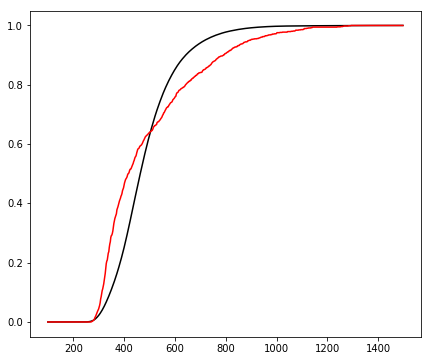

raw 01: 287.000  05: 321.000  10: 345.000 15: 367.000  90: 643.000  95: 717.000  99: 879.000
bg 01: 283.000  05: 303.000  10: 313.000 15: 323.000  90: 791.000  95: 893.000  99: 1119.000


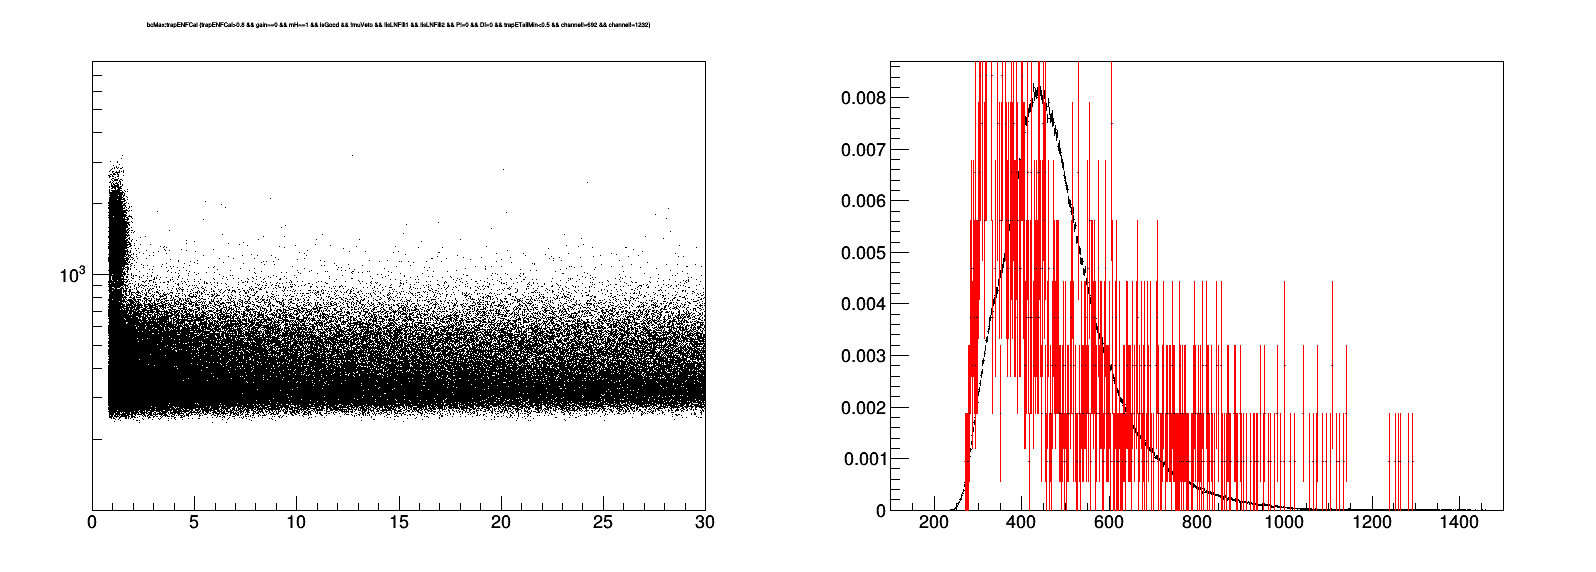

In [23]:
ds = 5
bins, lower, upper = 700,100,1500

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()
bgCut = "&& isNat && trapENFCal > 9.8 && trapENFCal < 10.8" # Integrating over 10.4 keV peak
calib = ROOT.TChain("skimTree"); calib.Add("~/project/cal-lat/latSkimDS%d*.root"%ds)
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",1600,600)
c.Divide(2,1)
c.cd(1) 

# make the raw spectrum
ROOT.gPad.SetLogy(1)
calib.Draw("bcMax:trapENFCal>>h1(10,0,30,10,100,8000)",theCut)

c.cd(2); ROOT.gPad.SetLogy(0); ROOT.gPad.SetLogx(0)

h0 = ROOT.TH1D("h0","",bins,lower,upper)
h01 = ROOT.TH1D("h01","",bins,lower,upper)
calib.Project("h0","bcMax",theCut+"&& trapENFCal > 5")
bg.Project("h01","bcMax",theCut+bgCut)
h0.Scale(1/h0.Integral()); h0.SetLineColor(ROOT.kBlack); h0.Draw()
h01.Scale(1/h01.Integral()); h01.SetLineColor(ROOT.kRed); h01.Draw("SAME")
c.Draw()

# Direct integral method
raw01,raw05,raw10,raw15,raw90,raw95,raw99 = GetIntegralPoints(h0)
bg01,bg05,bg10,bg15,bg90,bg95,bg99 = GetIntegralPoints(h01)
print "raw 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (raw01,raw05,raw10,raw15,raw90,raw95,raw99)
print "bg 01: %.3f  05: %.3f  10: %.3f 15: %.3f  90: %.3f  95: %.3f  99: %.3f" % (bg01,bg05,bg10,bg15,bg90,bg95,bg99)


fig = plt.figure(figsize=(7,6),facecolor='w')
x_h0, y_h0 = npTH1D(h0)
int_h0 = integFunc(y_h0)
plt.plot(x_h0,int_h0,'black')
x1_h0, y1_h0 = npTH1D(h01)
int1_h0 = integFunc(y1_h0)
plt.plot(x1_h0,int1_h0,'red')
# plt.axvline(raw95,color='red')
# plt.axvline(raw99,color='green')
# plt.axvline(raw01,color='green')
# plt.axvline(raw05,color='red')
plt.show()